# TITANIC

**Bibliothèque et chargement des données**

In [1]:
# Bibliothèque 
import pandas as pd
import numpy as np
import os

print(os.getcwd())

C:\Users\SEIGNEUR\Desktop\DEFI-IA\Ressources_Kaggle\new_approch_\preprocessing


In [67]:
path = 'C:/Users/SEIGNEUR/Documents/IDSI_inphb/IDSI_M2/Spark_python/Data/'
data_train = pd.read_csv(path + 'train.csv')
data_test = pd.read_csv(path+'test.csv')
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Nombre de ligne et colonne du jeu de données d'entraunement
data_train.shape

(891, 12)

In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Colonnes qui possèdent des valeurs manquantes
colonnes = data_train.columns
L = []
for col in colonnes:
    if data_train[col].isna().sum()>0:
        L.append(col)
[{col:data_train[col].isna().sum()} for col in L]

[{'Age': 177}, {'Cabin': 687}, {'Embarked': 2}]

In [6]:
#Convertion de certaines ^colonnes
data_train["Pclass"] = data_train["Pclass"].astype('object')

In [7]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [8]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
for col in data_train.columns:
    if (data_train[col].dtype is float) or (data_train[col].dtype is int):
        data_train[col] = data_train[col].fillna(data_train[col].median())
    if (data_train[col].dtype == object):
        data_train[col] = data_train[col].fillna(data_train[col].mode()[0])

In [10]:
data_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

In [11]:
data_train['Age'] = data_train['Age'].fillna(data_train['Age'].median())

In [12]:
data_train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [13]:
# Choix des variables explicatives
def parse_model(X,use_columns):
    if "Survived" not in X.columns:
        raise ValueError("target column survived should belong to data_train")
    target = X["Survived"]
    X = X[use_columns]
    return X,target
model_cols1 = ['SibSp','Parch','Fare']
X,y = parse_model(X=data_train.copy(), use_columns = model_cols1)

In [14]:
# Découpage en X_train, X_test, y_train, y_test
from sklearn.model_selection import cross_val_score, train_test_split
from  sklearn.linear_model import LogisticRegression

X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.2, random_state = 0)

**Modélisatio : logistic simple**

In [15]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
print("score train : ",lr.score(X_train,y_train))
print("score test : ", lr.score(X_test,y_test))

score train :  0.6643258426966292
score test :  0.6983240223463687


In [16]:
survived = data_train[data_train["Survived"]==1]
dead = data_train[data_train["Survived"]==0]

**Etude des variables**

Populating the interactive namespace from numpy and matplotlib


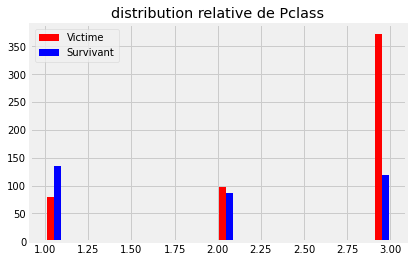

In [17]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
%matplotlib inline
%pylab inline

def plot_hist(feature,bins=20):
    x1 = np.array(dead[feature].dropna())
    x2 = np.array(survived[feature].dropna())
    plt.hist([x1,x2],label=["Victime","Survivant"],bins=bins, color=['r','b'])
    plt.legend(loc = "upper left")
    plt.title('distribution relative de %s' %feature)
    plt.show()
plot_hist('Pclass')

In [18]:
#Ajoute de la variable Pclass 
model_cols2 = ['SibSp','Parch','Fare','Pclass']
X,y = parse_model(X=data_train.copy(), use_columns = model_cols2)

In [19]:
X = pd.get_dummies(X,columns=['Pclass'])

In [20]:
X.head()

,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3
0,1,0,7.2500,0,0,1
1,1,0,71.2833,1,0,0
2,0,0,7.9250,0,0,1
3,1,0,53.1000,1,0,0
4,0,0,8.0500,0,0,1


In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=0)

In [22]:
lr.fit(X_train,y_train)
print("score train : ",lr.score(X_train,y_train))
print("score test : ", lr.score(X_test,y_test))

score train :  0.6839887640449438
score test :  0.7150837988826816


In [23]:
model_cols3 = ['SibSp','Parch','Fare','Pclass','Age']
X,y = parse_model(X=data_train.copy(),use_columns = model_cols3)
X = pd.get_dummies(X,columns = ['Pclass'])

In [24]:
#Découpage des données
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=0)

#Entrainement de la logistic et score
lr.fit(X_train,y_train)
print("score train : ",lr.score(X_train,y_train))
print("score test : ", lr.score(X_test,y_test))

score train :  0.6882022471910112
score test :  0.7374301675977654


C:\Users\SEIGNEUR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


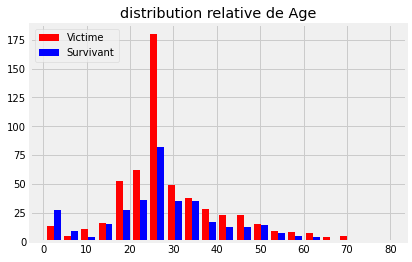

In [25]:
plot_hist('Age')

In [26]:
data_train['Age'].apply(lambda x : 0.0 if(x>0 and x<=9) else 1)

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
886    1.0
887    1.0
888    1.0
889    1.0
890    1.0
Name: Age, Length: 891, dtype: float64

In [27]:
lr.fit(X_train,y_train)
print("score train : ",lr.score(X_train,y_train))
print("score test : ", lr.score(X_test,y_test))

score train :  0.6882022471910112
score test :  0.7374301675977654


C:\Users\SEIGNEUR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
#Ajout de la variable Sex dans le model
model_cols4 = ['SibSp','Parch','Fare','Pclass','Age','Sex']
X,y = parse_model(X=data_train.copy(),use_columns = model_cols4)
X = pd.get_dummies(X,columns = ['Pclass','Sex'])

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=0)

lr.fit(X_train,y_train)
print("score train : ",lr.score(X_train,y_train))
print("score test : ", lr.score(X_test,y_test))

score train :  0.7935393258426966
score test :  0.8100558659217877


C:\Users\SEIGNEUR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


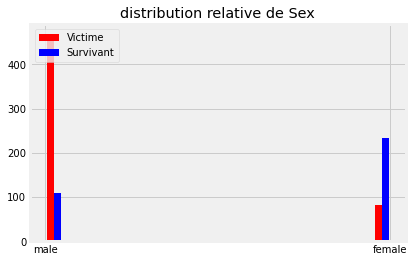

In [33]:
plot_hist('Sex')

Parmis les victimes il y a plus d'homme que de femme

In [41]:
data_train.Name[0].split()[1]

'Mr.'

In [43]:
data_train['Titre'] = data_train['Name'].apply(lambda x: x.split()[1])
data_train['Titre'].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Planke,', 'Don.', 'Rev.',
       'Billiard,', 'der', 'Walle,', 'Dr.', 'Pelsmaeker,', 'Mulder,', 'y',
       'Steen,', 'Carlo,', 'Mme.', 'Impe,', 'Ms.', 'Major.', 'Gordon,',
       'Messemaeker,', 'Mlle.', 'Col.', 'Capt.', 'Velde,', 'the',
       'Shawah,', 'Jonkheer.', 'Melkebeke,', 'Cruyssen,'], dtype=object)

In [46]:
from sklearn.metrics import classification_report
model_cols5 = ['SibSp','Parch','Fare','Pclass','Age','Sex','Titre']

X,y = parse_model(X=data_train.copy(),use_columns=model_cols5)
X=pd.get_dummies(X,columns = ['Pclass','Sex','Titre'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=0)
lr.fit(X_train,y_train)
print("Train :",lr.score(X_train,y_train))
print("Test :",lr.score(X_test,y_test))
y_pred = lr.predict(X_test)
print(classification_report(y_test,y_pred))

Train : 0.8384831460674157
Test : 0.7988826815642458
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       110
           1       0.73      0.75      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



C:\Users\SEIGNEUR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Random Forest au secours du titanic**

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [59]:
##Create a parameters dictionary to be passed into GridSearchCV
##Optimize over pdifferent  values of:
## * n_estimators
## * max_depth : nombre d'observation 
## * min_samples_split
## * min_sample_leaf
## * 

Estimator = RandomForestClassifier(random_state=42)
parameters = {
    'n_estimators': [100,150,200,250,300],
    'max_depth': np.arange(6,16,2), #parcour la liste de 6 à 15 par pas de 2
    'min_samples_split': np.arange(10,30,2), #le nombre minimum d'observation qu'il faut pour diviser le noeud
    'min_samples_leaf': np.arange(5,20,5)
}

## Create the full model using the GridSer=archCV object.
## It should use estimator, parameters,
## and use cross validation by setting the cv parameters.

model2 = GridSearchCV(Estimator, parameters, verbose = 1, cv=5 , n_jobs=-1)
model2.fit(X_train, y_train)

Fitting 5 folds for each of 750 candidates, totalling 3750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 3750 out of 3750 | elapsed:  9.6min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': array([ 6,  8, 10, 12, 14]),
                         'min_samples_leaf': array([ 5, 10, 15]),
                         'min_samples_split': array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28]),
                         'n_estimators': [100, 150, 200, 250, 300]},
             verbose=1)

In [60]:
model2.best_estimator_

RandomForestClassifier(max_depth=14, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=250, random_state=42)

In [61]:
model2.best_score_

0.8234322580645163

In [62]:
print("Test score :",model2.score(X_test,y_test))

Test score : 0.8059701492537313


In [71]:
os.getcwd()

'C:\\Users\\SEIGNEUR\\Desktop\\DEFI-IA\\Ressources_Kaggle\\new_approch_\\preprocessing'